In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from itertools import combinations
import missingno
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
print("India Movie Data Size  :" ,df.size)

India Movie Data Size  : 155090


In [8]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
all_data_info = df.describe(include='all')
all_data_info

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [11]:
df['Genre'].nunique()

485

In [12]:
df.groupby(['Genre']).count()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,,
Action,1289,1265,262,417,417,1249,1207,1124,1005
"Action, Adventure",41,41,17,24,24,41,40,39,39
"Action, Adventure, Biography",1,1,1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,41,37,40,40,42,42,42,42
"Action, Adventure, Crime",19,19,11,16,16,19,19,19,19
...,...,...,...,...,...,...,...,...,...
"Thriller, Action",2,2,1,1,1,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1,1,1
"Thriller, Mystery",3,3,2,3,3,3,3,3,3


In [13]:
df[(df[ 'Rating' ] == df[ 'Rating' ].max())]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [14]:
df[(df[ 'Rating' ] == df[ 'Rating' ].min())]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,(2020),133 min,"Action, Drama",1.1,"67,785",Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [15]:
df.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [16]:
df['Duration'].unique()


array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [17]:
df.Rating.nunique()

84

In [18]:
df.Rating.unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [19]:
df['Director'].nunique()

5938

In [20]:
df["Director"].value_counts().head(6)


Director
Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     47
Nanabhai Bhatt     46
Name: count, dtype: int64

In [21]:
df['Votes'].nunique()


2034

In [22]:
# Convert the 'Year' column to string type
df['Year'] = df['Year'].astype(str)
# Extract numeric part of the string
df['Year'] = df['Year'].str.extract('(\d+)')
# Convert to numeric, handling non-finite values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# Replace non-finite values (NaN, inf) with a default value
default_year = 1900  # Replace with your desired default year
df['Year'] = df['Year'].replace([np.nan, np.inf, -np.inf], default_year)
# Convert to integers
df['Year'] = df['Year'].astype(int)
# Convert to numeric
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df["Votes"]=df["Votes"].replace("$5.16M", 516)
# Convert to numeric
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')
# Assuming df is your DataFrame
Actor1 = df['Actor 1']
Actor2 = df['Actor 2']
Actor3 = df['Actor 3']
# Concatenating the series into one series
Actors = pd.concat([Actor1, Actor2, Actor3])

In [24]:
def Histogram(column):
    global d
    # Create a histogram using plotly.graph_objects
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df[column], marker_color='skyblue', marker_line_color='black', marker_line_width=1.5))

    fig.update_layout(title=f'Histogram of {column}',
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      template='plotly_dark')

    fig.show()
Histogram('Rating')

In [25]:
Histogram('Year')

In [26]:
Histogram('Duration')

In [28]:
figg = px.histogram(data_frame=df, x='Genre', title='total no of Genre', color='Genre')

figg.show()

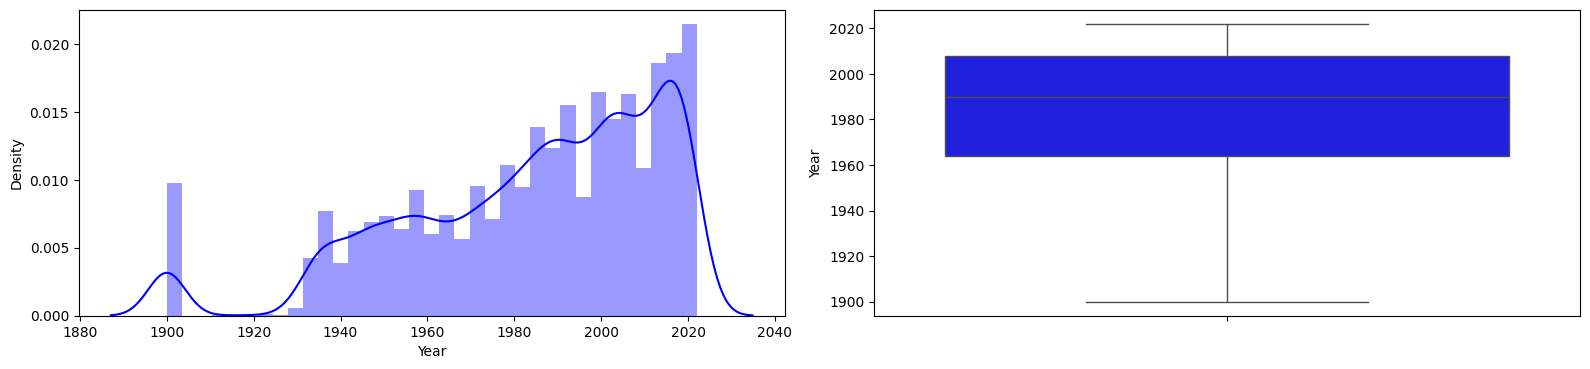

In [30]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Year'],color='blue')

plt.subplot(2,2,2)
sns.boxplot(df['Year'],color='blue')

plt.tight_layout()
plt.show()

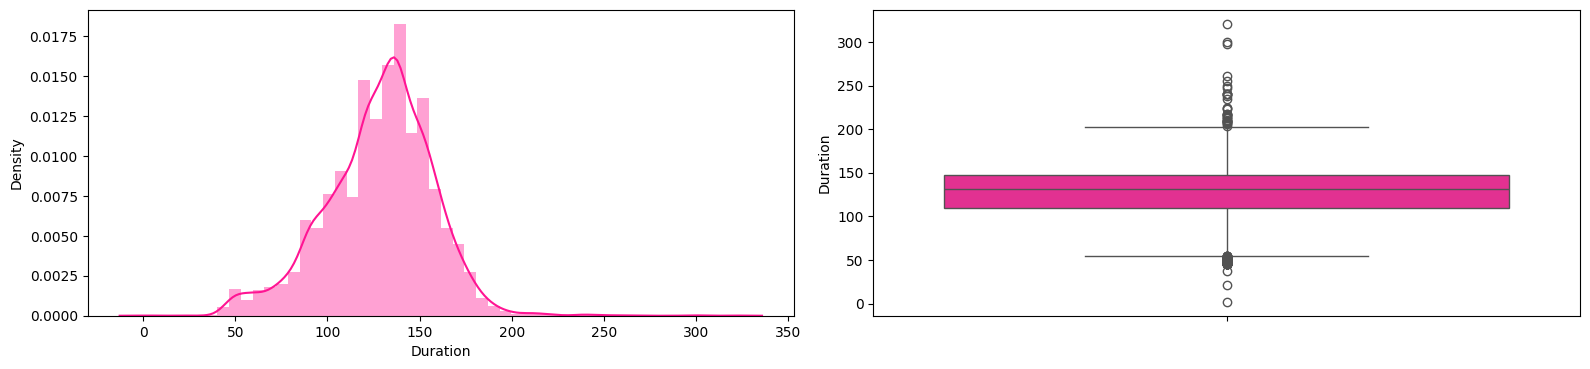

In [31]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Duration'],color='DeepPink')

plt.subplot(2,2,2)
sns.boxplot(df['Duration'],color='DeepPink')

plt.tight_layout()
plt.show()

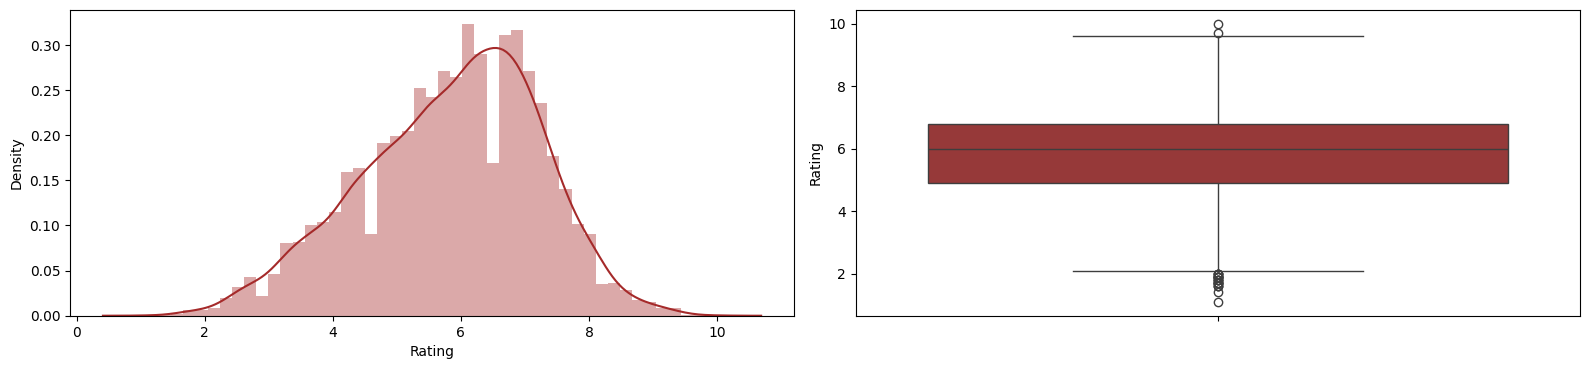

In [32]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Rating'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(df['Rating'],color='brown')

plt.tight_layout()
plt.show()

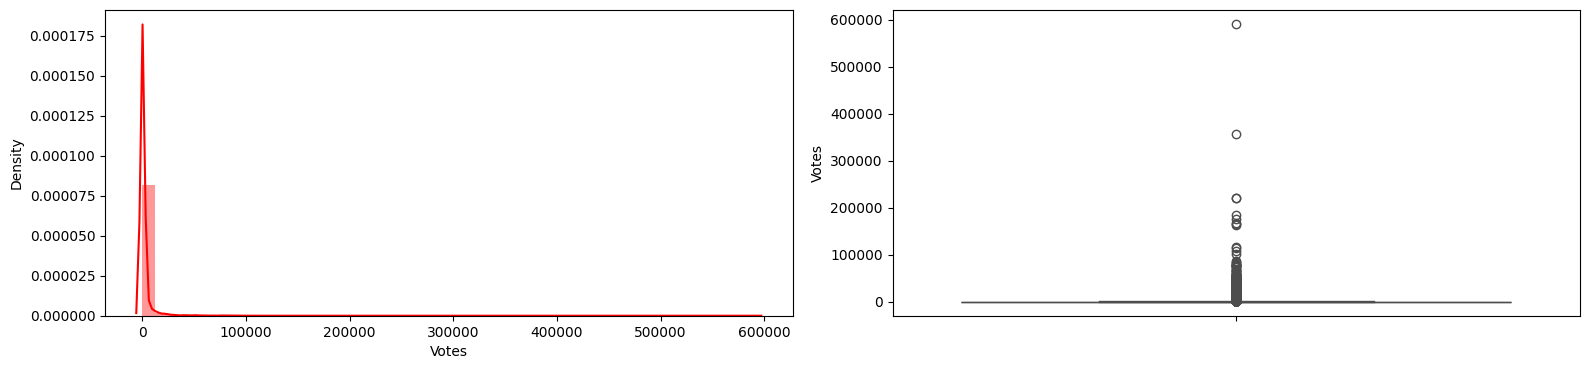

In [33]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Votes'],color='red')

plt.subplot(2,2,2)
sns.boxplot(df['Votes'],color='red')

plt.tight_layout()
plt.show()

In [36]:
df2 = df.loc[(df['Rating'] > 8) & (df['Votes'] > 10000), ['Rating', 'Votes', 'Name']]

fig = px.bar(df2, x='Name', y='Votes', color='Rating', title='Movies with Rating greater than 8 and votes greater than 10000',
             labels={'Votes': 'Votes', 'Name': 'Movie Name'},
             width=1000, height=600)

fig.update_layout(xaxis=dict(tickangle=65, tickmode='array', tickvals=list(range(len(df2['Name']))),
                             ticktext=df2['Name']))

fig.show()

In [37]:
df2 = df.loc[(df['Rating'] <= 5) & (df['Votes'] > 10000), ['Rating', 'Votes', 'Name']]

fig = px.bar(df2, x='Name', y='Votes', color='Rating', title='Movies with Rating smaller than equal 5 and votes greater than 10000',
             labels={'Votes': 'Votes', 'Name': 'Movie Name'},
             width=1000, height=600)

fig.update_layout(xaxis=dict(tickangle=30, tickmode='array', tickvals=list(range(len(df2['Name']))),
                             ticktext=df2['Name']))

fig.show()

In [39]:
top5_rating = df[['Year', 'Rating']].sort_values(by='Rating', ascending=False).head()

# Create a bar chart using Plotly Express
fig = px.bar(top5_rating, x='Year', y='Rating',
             color='Year', text='Rating',
             labels={'Year': 'Year', 'Rating': 'Rating'},
             title='Overall Top 5 Ratings',
             color_discrete_map={'Year': 'purple'})

fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

fig.update_layout(xaxis=dict(tickangle=0))

# Customize layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Rating",
    title_font=dict(size=20, family="Arial, sans-serif", color="RebeccaPurple"),
    font=dict(family="Arial, sans-serif", size=15, color="Black"),
    legend=dict(title=dict(text='', font=dict(size=10)))
)

fig.show()

In [40]:
top5_rating = df[['Year', 'Rating']].sort_values(by='Rating', ascending=False).head()

# Create a bar chart using Plotly.graph_objects
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=top5_rating['Year'],
    y=top5_rating['Rating'],
    marker=dict(color='purple')
))

# Add annotations for each bar
for index, row in top5_rating.iterrows():
    fig.add_annotation(
        x=row['Year'],
        y=row['Rating'],
        text=f'{row["Rating"]:.1f}',
        showarrow=True,
        arrowhead=4,
        arrowcolor='black',
        font=dict(size=12),
        xanchor='center',
        yanchor='bottom'
    )

# Customize layout
fig.update_layout(
    title='Overall Top 5 Ratings',
    xaxis_title='Year',
    yaxis_title='Rating',
    xaxis=dict(tickmode='array', tickvals=top5_rating['Year'], ticktext=top5_rating['Year']),
    font=dict(size=15, color='black'),
    showlegend=False
)

# Show the plot
fig.show()

In [41]:
def bestTenPlot(column):
    global d

    # Get the top 10 values and their counts
    top_values = df[column].value_counts().sort_values(ascending=False)[:10]

    # Create a DataFrame for Plotly Express
    data = {'Values': top_values.index, 'Count': top_values.values}

    # Create a bar chart using Plotly Express
    fig = px.bar(data, x='Values', y='Count', text='Count',
                 title=f'best Ten {column}',
                 labels={'Values': column, 'Count': 'Count'},
                 template='plotly_dark')

    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

    fig.update_layout(xaxis=dict(tickangle=55, tickmode='linear'))

    fig.show()
bestTenPlot('Name')

In [42]:
bestTenPlot("Director")


In [43]:
bestTenPlot("Actor 1")

In [44]:
bestTenPlot("Actor 2")

In [45]:
bestTenPlot("Actor 3")

In [46]:
bestTenPlot("Genre")

In [48]:
df.isnull().sum().sort_values(ascending = False)

Duration    8269
Rating      7590
Votes       7590
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Director     525
Name          10
Year           0
dtype: int64

In [49]:
def missing (h):
    missing_number = h.isnull().sum().sort_values(ascending=False)
    missing_percent = (h.isnull().sum()/h.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing(df)

,Missing_Number,Missing_Percent
Duration,8269,0.533174
Rating,7590,0.489393
Votes,7590,0.489393
Actor 3,3144,0.202721
Actor 2,2384,0.153717
Genre,1877,0.121027
Actor 1,1617,0.104262
Director,525,0.033851
Name,10,0.000645
Year,0,0.000000


<Axes: >

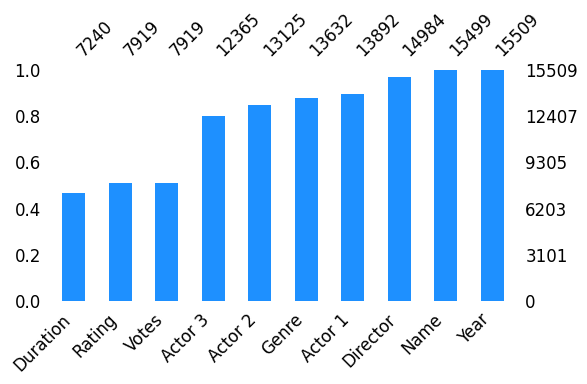

In [50]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(6,3), fontsize=12)

In [52]:
df.dropna(subset=['Rating'], inplace=True)
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df.isnull().sum().sort_values(ascending = False)

Name        9
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [53]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110.0,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147.0,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [54]:
actor1_encoding = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()
df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding['Rating']), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding['Rating']), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding['Rating']), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding['Rating']), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding['Rating']), 1)
df.drop(['Name','Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
df.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8.0,6.8,7.0,7.0,7.0,6.0
3,2019,110.0,4.4,35.0,5.2,4.4,4.5,4.4,5.7
3,2019,110.0,4.4,35.0,5.2,4.4,4.5,4.4,5.7
5,1997,147.0,4.7,827.0,4.8,5.7,5.9,5.4,5.7
5,1997,147.0,4.7,827.0,4.8,5.7,5.9,5.4,6.0


In [55]:
fig = go.Figure()
# Plotting top 5 actors
for actor_column in ['actor1_encoded', 'actor2_encoded', 'actor3_encoded']:
    top5_actors = df[['Year', actor_column]].sort_values(by=actor_column, ascending=False).head()
    fig.add_trace(go.Bar(x=top5_actors['Year'], y=top5_actors[actor_column],
                         name=actor_column, marker_color='purple'))

# Plotting director
top_director = df[['Year', 'director_encoded']].sort_values(by='director_encoded', ascending=False).head()
fig.add_trace(go.Bar(x=top_director['Year'], y=top_director['director_encoded'],
                     name='director_encoded', marker_color='orange'))

# Plotting genre
top_genre = df[['Year', 'genre_encoded']].sort_values(by='genre_encoded', ascending=False).head()
fig.add_trace(go.Bar(x=top_genre['Year'], y=top_genre['genre_encoded'],
                     name='genre_encoded', marker_color='green'))

# Customize layout
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Encoded Rating'),
    title=dict(text='Top 5 Actors, Director, and Genre', font=dict(size=20)),
    font=dict(family="Arial, sans-serif", size=15, color="Black"),
    barmode='group'
)
fig.show()

<Axes: >

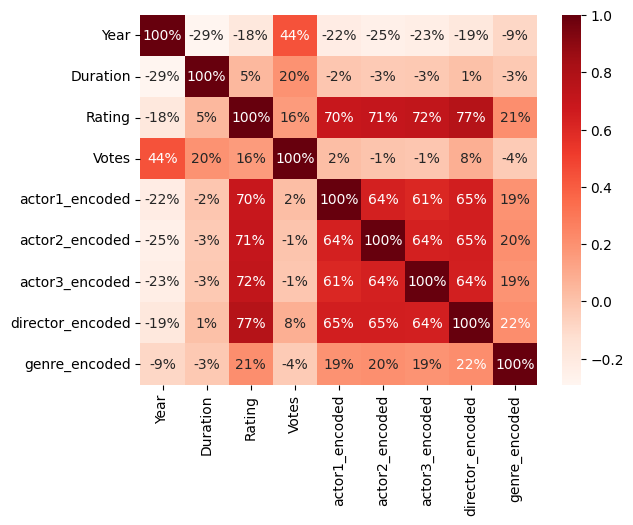

In [56]:
sns.heatmap(df.corr(method='spearman'),annot=True,cmap="Reds", fmt='.0%')

In [57]:
X = df.drop(['Rating'], axis=1)
y = df['Rating']

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state= 20)

In [59]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)
print('Mean Squared Error (Linear Regression - Test):',   mean_squared_error(y_test, lr_pred_test))
print('Mean Absolute Error  (Linear Regression - Test): ',mean_absolute_error(y_test, lr_pred_test))
print('R2 score (Linear Regression - Train): ',           r2_score(y_train,lr_pred_train))
print('R2 Score (Linear Regression - Test):',             r2_score(y_test,lr_pred_test))

Mean Squared Error (Linear Regression - Test): 0.4450768993578157
Mean Absolute Error  (Linear Regression - Test):  0.49761931765188483
R2 score (Linear Regression - Train):  0.7480112895073628
R2 Score (Linear Regression - Test): 0.7605122464003876


In [60]:
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
rf_pred_train = rfg.predict(X_train)
rf_pred_test = rfg.predict(X_test)
print('Mean Squared Error (Random Forest - Test):',mean_squared_error(y_test, rf_pred_test))
print('Mean Absolute Error  (Random Forest - Test): ',mean_absolute_error(y_test, rf_pred_test))
print('R2 score (Random Forest - Train): ',r2_score(y_train,rf_pred_train))
print('R2 Score (Random Forest - Test):',r2_score(y_test,rf_pred_test))

Mean Squared Error (Random Forest - Test): 0.11031992132639784
Mean Absolute Error  (Random Forest - Test):  0.1787678803641092
R2 score (Random Forest - Train):  0.9913794147880213
R2 Score (Random Forest - Test): 0.940638864488663


In [61]:
xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgboost_train = xgboost.predict(X_train)
y_pred_xgboost_test = xgboost.predict(X_test)
print('Mean Squared Error (xgboost - Test):', mean_squared_error(y_test, y_pred_xgboost_test))
print('Mean Absolute Error  (xgboost - Test): ',mean_absolute_error(y_test, y_pred_xgboost_test))
print('R2 score (xgboost - Train): ', r2_score(y_train, y_pred_xgboost_train))
print('R2 Score (xgboost - Test):', r2_score(y_test,y_pred_xgboost_test))

Mean Squared Error (xgboost - Test): 0.189289240197709
Mean Absolute Error  (xgboost - Test):  0.2928554876728083
R2 score (xgboost - Train):  0.9450738957153204
R2 Score (xgboost - Test): 0.8981469157780706


In [63]:
dt = DecisionTreeRegressor(max_depth=9,random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print('Mean Squared Error (Decision Tree - Test):',mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error  (Decision Tree - Test): ',mean_absolute_error(y_test, y_pred_test))
print('R2 score (Decision Tree - Train): ',r2_score(y_train,y_pred))
print('R2 Score (Decision Tree - Test):',r2_score(y_test,y_pred_test))

Mean Squared Error (Decision Tree - Test): 0.36275011011464026
Mean Absolute Error  (Decision Tree - Test):  0.40940499391208035
R2 score (Decision Tree - Train):  0.8283980676923717
R2 Score (Decision Tree - Test): 0.8048107886194168


In [64]:
# Evaluate Linear Regression
mae_lr_train = mean_absolute_error(y_train, lr_pred_train)
mae_lr_test = mean_absolute_error(y_test, lr_pred_test)
mse_lr_train = mean_squared_error(y_train, lr_pred_train)
mse_lr_test = mean_squared_error(y_test, lr_pred_test)

# Evaluate Random Forest Regressor
mae_rf_train = mean_absolute_error(y_train, rf_pred_train)
mae_rf_test = mean_absolute_error(y_test, rf_pred_test)
mse_rf_train = mean_squared_error(y_train, rf_pred_train)
mse_rf_test = mean_squared_error(y_test, rf_pred_test)

# Evaluate Random Forest Regressor
mae_dt_train = mean_absolute_error(y_train, y_pred)
mae_dt_test = mean_absolute_error(y_test, y_pred_test)
mse_dt_train = mean_squared_error(y_train, y_pred)
mse_dt_test = mean_squared_error(y_test, y_pred_test)

# Evaluate xgboost Regressor
mae_xg_train = mean_absolute_error(y_train, y_pred_xgboost_train)
mae_xg_test = mean_absolute_error(y_test, y_pred_xgboost_test)
mse_xg_train = mean_squared_error(y_train, y_pred_xgboost_train)
mse_xg_test = mean_squared_error(y_test, y_pred_xgboost_test)
# Create DataFrames for plotting
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'decision tree','xgboost Regressor'],
    'MAE Train': [mae_lr_train, mae_rf_train,mae_dt_train,mae_xg_train],
    'MAE Test': [mae_lr_test, mae_rf_test, mae_dt_test,mae_xg_test],
    'MSE Train': [mse_lr_train, mse_rf_train, mse_dt_train,mse_xg_train],
    'MSE Test': [mse_lr_test, mse_rf_test, mse_dt_test,mse_xg_test]
})
# Plotting MAE
fig_mae = px.bar(metrics_df, x='Model', y=['MAE Train', 'MAE Test'],
                 title='Mean Absolute Error (MAE)',
                 labels={'value': 'MAE', 'variable': 'Dataset'},
                 color_discrete_map={'MAE Train': 'blue', 'MAE Test': 'red'})
fig_mae.update_layout(barmode='group')

# Show the plots
fig_mae.show()

In [65]:
# Plotting MSE
fig_mse = px.bar(metrics_df, x='Model', y=['MSE Train', 'MSE Test'],
                 title='Mean Squared Error (MSE)',
                 labels={'value': 'MSE', 'variable': 'Dataset'},
                 color_discrete_map={'MSE Train': 'blue', 'MSE Test': 'red'})
fig_mse.update_layout(barmode='group')

fig_mse.show()

In [66]:
scatter_color = 'skyblue'
plot_width = 800
plot_height = 275

# Scatter plot for Training Set
fig_train = px.scatter(x=y_train, y=y_pred_xgboost_train, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                       title='Evaluation of Training xgboost Regressor Model', trendline='ols',
                       color_discrete_sequence=[scatter_color])
fig_train.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Scatter plot for Testing Set
fig_test = px.scatter(x=y_test, y=y_pred_xgboost_test, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                      title='Evaluation of Testing xgboost Regressor Model', trendline='ols',
                      color_discrete_sequence=[scatter_color])
fig_test.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Show the plots
fig_train.show()
fig_test.show()

In [67]:
scatter_color = 'skyblue'
plot_width = 800
plot_height = 275

# Scatter plot for Training Set
fig_train = px.scatter(x=y_train, y=rf_pred_train, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                       title='Evaluation of Training Random Forest Regressor Model', trendline='ols',
                       color_discrete_sequence=[scatter_color])
fig_train.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Scatter plot for Testing Set
fig_test = px.scatter(x=y_test, y=rf_pred_test, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                      title='Evaluation of Testing Random Forest Regressor Model', trendline='ols',
                      color_discrete_sequence=[scatter_color])
fig_test.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Show the plots
fig_train.show()
fig_test.show()

In [68]:
prediction_Random_Forest_Regressor  = pd.DataFrame({'actual_rating': y_test,
                        'predicted_rating': rf_pred_test.ravel(),
                        'residual': y_test - rf_pred_test}
                      )
prediction_Random_Forest_Regressor.head(10)

,actual_rating,predicted_rating,residual
3212,5.3,5.265,0.035
4300,6.1,6.097,0.003
4486,6.2,6.130,0.070
12411,4.9,5.497,-0.597
3601,5.6,5.589,0.011
15300,6.8,6.404,0.396
10070,7.0,6.888,0.112
369,4.6,4.734,-0.134
5819,4.6,4.638,-0.038
1121,6.7,6.610,0.090
